In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from random import randrange
import scipy

# import some data to play with
iris = datasets.load_iris()
X = iris.data  
y = iris.target
#print(np.shape(X))
#print(np.shape(y))

In [2]:
"""
RLS function used to update weights
"""
def RLS (actual, inp, weight, r_k_inv ):
    #r_k_inv = 1000*np.identity(np.shape(i)[0])
    # actual output inp and weight are matrices
    y_not = np.matmul(weight ,inp)
    error = actual - y_not
    z_k = np.matmul(r_k_inv, inp)
    q = np.matmul(inp.T , z_k)
    v = 1/(1 + q)
    z_k_tilde = v * z_k
    w_new = weight + error * z_k_tilde.T
    r_new_inv = r_k_inv - np.matmul(z_k_tilde, z_k_tilde.T)
    #print(np.shape(y_not),np.shape(error),np.shape(z_k),np.shape(q),np.shape(v),np.shape(z_k_tilde),np.shape(w_new), np.shape(r_k_inv))
    return w_new, r_new_inv
    return weight + (2 * learning_rate * (inp * error))
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [3]:
w = np.zeros([X.shape[1],len(np.unique(y))])
lam = 0.5
iterations = 1000
learningRate = 1e-2
losses = []
train = int(np.shape(X)[0] * 0.8)
for i in range(0,int(np.shape(X)[0] * 0.8)):
    loss, grad = getLoss(w,X,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)

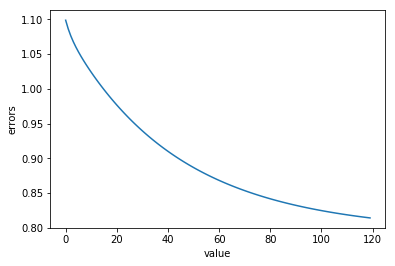

In [4]:
plt.plot(losses)
plt.ylabel('errors')
plt.xlabel('value')
plt.show()

In [5]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [6]:
print('Training Accuracy: ', getAccuracy(X[:train],y[:train]))
print('Test Accuracy: ', getAccuracy(X[train:], y[train:]))

Training Accuracy:  0.583333333333
Test Accuracy:  1.0


In [7]:
out = (np.matmul(X[5],w))
out = np.exp(out) / np.sum(np.exp(out), axis=0)
print("Validation for example 6 : predicted - ",np.argmax(out),"actual - " ,y[1])


Validation for example 6 : predicted -  0 actual -  0
